In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from Fitter import Fitter
from Fitter import Functions
import numpy as np
import matplotlib.pyplot as plt
import random, scipy

In [97]:
f = Fitter("linear")

1.0003217058126825 4.992553381782177


<IPython.core.display.Javascript object>


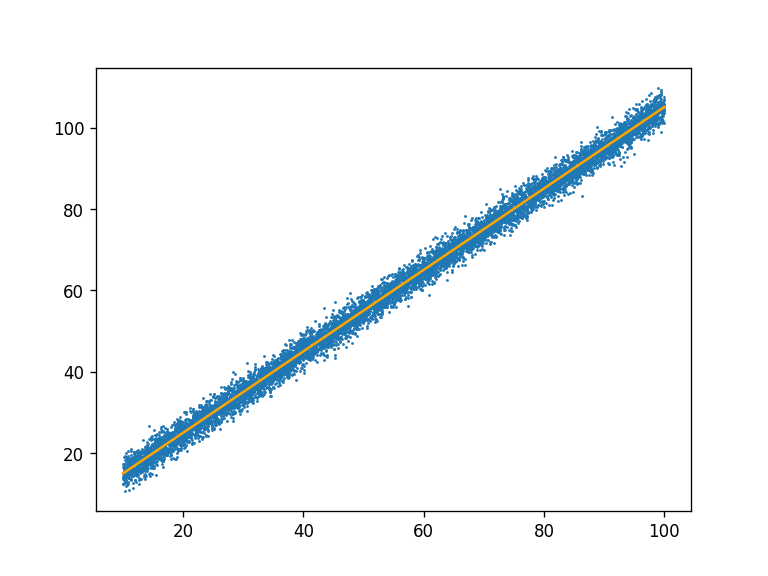

In [98]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)
fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

plt.plot(xx, xx*p.m+p.b, c="orange")

<IPython.core.display.Javascript object>


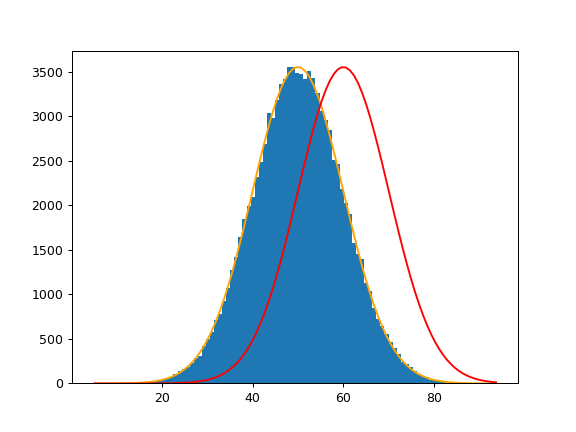

x,amp,mean,sigma
Estimating with:  [3559.0, 49.385820957123336, 25.787395071597942]
vars: [3555.20581117568, 49.99416447824961, 10.01449948938673], amp: 3555.20581117568, mean: 49.99416447824961, sigma: 10.01449948938673
Mean is:  49.99416447824961
Sigma is:  10.01449948938673
Amplitude is:  3555.20581117568
[3555.20581117568, 49.99416447824961, 10.01449948938673]


In [62]:
f = Fitter("gaussian")

mu, sig = 50,10
yy = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yy, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
print(f)

p0=[10,30,10]
f.fit(xx,yy)
#or f.fit(xx,yy,p0=p0)
p = f.getParams()
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)
plt.plot(xx,f.evaluate(xx), c="orange")

plt.plot(xx,f.func(xx, p.amp, p.mean+10, p.sigma), c="red")

<IPython.core.display.Javascript object>


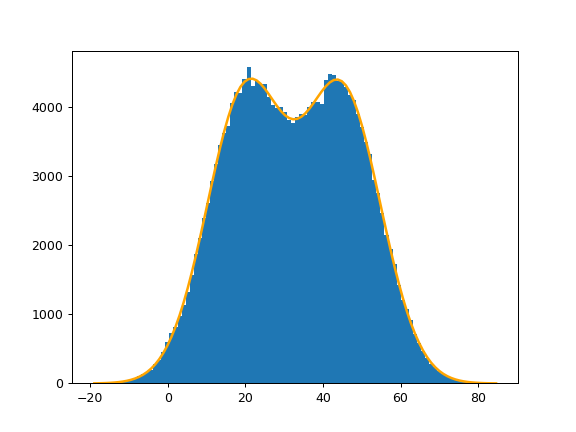

Estimating with:  [4576.0, 6.677842443258594, 15.102009259270712, 4470.0, 59.00320322899731, 15.102009259270712]
[4193.18421868   20.03440279    9.98907957 4175.42052414   45.04059869
    9.9632252 ]
vars: [4193.184218676886, 20.034402791639586, 9.989079566945742, 4175.4205241397285, 45.04059869298192, 9.963225197399199], amp_0: 4193.184218676886, mean_0: 20.034402791639586, sigma_0: 9.989079566945742, amp_1: 4175.4205241397285, mean_1: 45.04059869298192, sigma_1: 9.963225197399199


In [60]:
f = Fitter("gaussian")

mu, sig = 20,10
m2 = np.array(np.random.normal(20, 10, size = 100000))
m1 = np.array(np.random.normal(45, 10, size = 100000))
yy = np.concatenate((m2, m1))
fig = plt.figure()

res = plt.hist(yy, bins=100)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

p0=[5000,7,10,1000,60,10]
f.fit(xx,yy,2)#,p0=p0)
p = f.getParams()
print(f.par)
print(p)

plt.plot(xx,f.evaluate(xx), c="orange", lw=2)

<IPython.core.display.Javascript object>


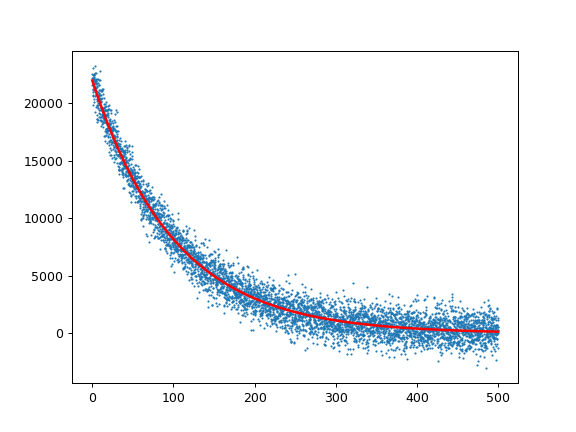

[ 9.99755890e+00 -9.88665441e-03]
vars: [9.99755890278312, -0.009886654414397218], p0: 9.99755890278312, p1: -0.009886654414397218


In [63]:
f = Fitter("expo")
fig = plt.figure()

p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

[ 0.0299087  -0.02581722  2.73251295  0.64500058  0.09059547  0.43740619]
vars: [0.029908704526125453, -0.025817221290178057, 2.732512951861315, 0.6450005755118787, 0.09059546884182999, 0.4374061939222058], x0_0: 0.029908704526125453, y0_0: -0.025817221290178057, sigma_x_0: 2.732512951861315, sigma_y_0: 0.6450005755118787, amp_0: 0.09059546884182999, theta_0: 0.4374061939222058


/tmp/ipykernel_516/2348173969.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


<IPython.core.display.Javascript object>


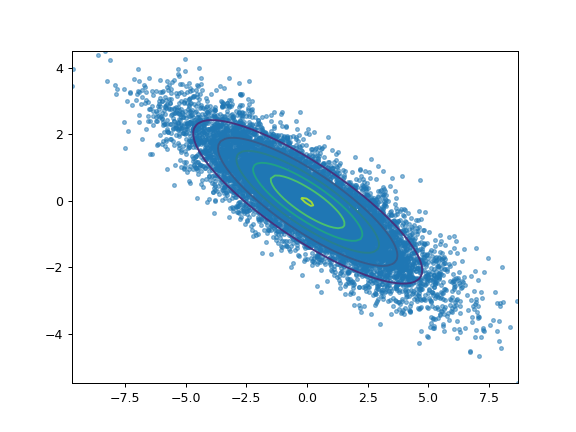

In [64]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y)
p = f.getParams()
print(f.par)
print(p)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

[ 0.0768052  -0.07695904  2.82197771  1.23580033  0.02352795  0.57679325
  3.98121836  4.18016472  2.27089632  3.77931505  0.00892293 -0.34695848]
vars: [0.0768051970293667, -0.07695903756367024, 2.821977712773327, 1.235800328592557, 0.023527951895702164, 0.5767932461674422, 3.98121836000395, 4.1801647175953764, 2.2708963238603843, 3.779315049444433, 0.008922925026531602, -0.34695847539965996], x0_0: 0.0768051970293667, y0_0: -0.07695903756367024, sigma_x_0: 2.821977712773327, sigma_y_0: 1.235800328592557, amp_0: 0.023527951895702164, theta_0: 0.5767932461674422, x0_1: 3.98121836000395, y0_1: 4.1801647175953764, sigma_x_1: 2.2708963238603843, sigma_y_1: 3.779315049444433, amp_1: 0.008922925026531602, theta_1: -0.34695847539965996
3.779315049444433


<IPython.core.display.Javascript object>


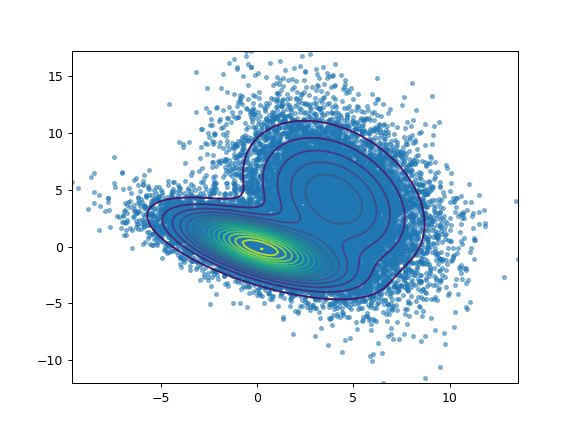

In [65]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,2)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

[-4.31582477e-02 -2.64979671e-02  2.79535768e+00  1.18840397e+00
  1.58763209e-02  5.88372325e-01  1.95731461e+00  4.98355246e+00
  2.81052813e+00  1.22465153e+00  1.53667078e-02  5.82190318e-01
  1.49693566e+01  4.95034618e+00  2.93908434e+00  1.23334711e+00
  1.47230894e-02  5.88841017e-01]
vars: [-0.04315824769166109, -0.02649796705076682, 2.7953576753057128, 1.1884039698770206, 0.01587632091190112, 0.5883723254007592, 1.957314605723998, 4.983552463370972, 2.810528125076841, 1.2246515348928835, 0.015366707828132369, 0.5821903179443441, 14.969356570810918, 4.950346178875423, 2.939084344105419, 1.2333471131334657, 0.014723089380022534, 0.5888410166086525], x0_0: -0.04315824769166109, y0_0: -0.02649796705076682, sigma_x_0: 2.7953576753057128, sigma_y_0: 1.1884039698770206, amp_0: 0.01587632091190112, theta_0: 0.5883723254007592, x0_1: 1.957314605723998, y0_1: 4.983552463370972, sigma_x_1: 2.810528125076841, sigma_y_1: 1.2246515348928835, amp_1: 0.015366707828132369, theta_1: 0.58219031

<IPython.core.display.Javascript object>


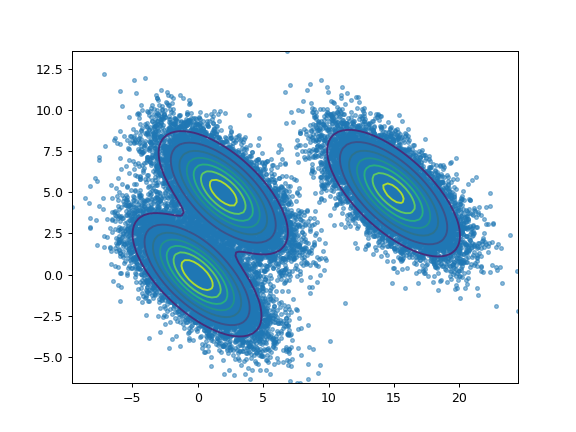

In [68]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,3)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_x_2)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))